Lucas van Wijk: 1719949

https://github.com/LucasVanWijk/HPP_Herkansing


# Analyse Bucketsort

## Wat mee te nemen

Wat moet worden mee genomen in een Big-O analyse is soms wat lastig te bepalen. Big-O is ook meer een inschatting van complexitiet in plaats van een objectieve constatering. In de praktijk zal je alle stappen mee moeten nemen die een concrete impact kunnen hebben op de uitvoer tijd. Wat dit inhoud is situatie afhankelijk. In een sorteer algoritme geimplementeerd in een bepaalde kan het aanwijzen van een variable dusdanig complex zijn dat het mee genomen moet worden. Maar in een neuraal netwerk is bijvoorbeeld het update van de weights insigificant vergeleken bij het berekenen van wat deze weights moeten zijn. Voor een Big-O analyse is deze operatie dan niet relevant. Echter kan het dan nogsteeds voor een bottleneck zorgen. Maar dit komt dan door race-conditions, critical sections, barriers en slow pipeline stages. Voor deze analyse is gekozen om te kijken naar hoe de hoeveelheid "stappen" groeien als de hoeveelheid data groeit.

## Handmatige analyse

Bucket sort heeft een Big O complexiteit van O(n). Dit kan worden afgeleid door de individuele stappen van het algoritme te analyseren.

    Distribution pass: Hierin wordt elke waarde in een bucket geplaatst. Als n met 100 toeneemt, zullen in deze stap 100 extra waarden in buckets moeten worden geplaatst. De complexiteit is O(n).

    Gathering pass: Hierin worden alle waarden weer teruggeplaatst. Ook hier is de complexiteit O(n)O(n).

Echter, het algoritme is ook afhankelijk van de grootte van de nummers. Voor een array van [100000, 1] zal het algoritme 6 keer door deze stappen moeten lopen. Hierdoor is de complexiteit dus eigenlijk O(n⋅k).Theoretisch is dit gelijk aan O(n), maar het laat wel de tekortkomingen zien van een Big-O analyse. Voor een niet-uniform verdeelde lijst kan dit algoritme erg inefficiënt zijn. Stel we hebben een lijst met enkel twee waarden: 18446744073709551615 (het maximum van een unsigned long) en 0. Dan zal het algoritme 20 keer door de genoemde stappen moeten lopen om deze twee waarden te sorteren. In zo'n situatie is zelfs een algoritme van O(n!) preferabel.

In de praktijk is dat niet heel relevant omdat het dus enkel een probleem is bij erg kleine lijsten. En bij erg kleine lijsten is het onwaarschijnlijk dat perfomance een grote bottleneck is.




# Bucket sort test

Text(0, 0.5, 'CPU time (s)')

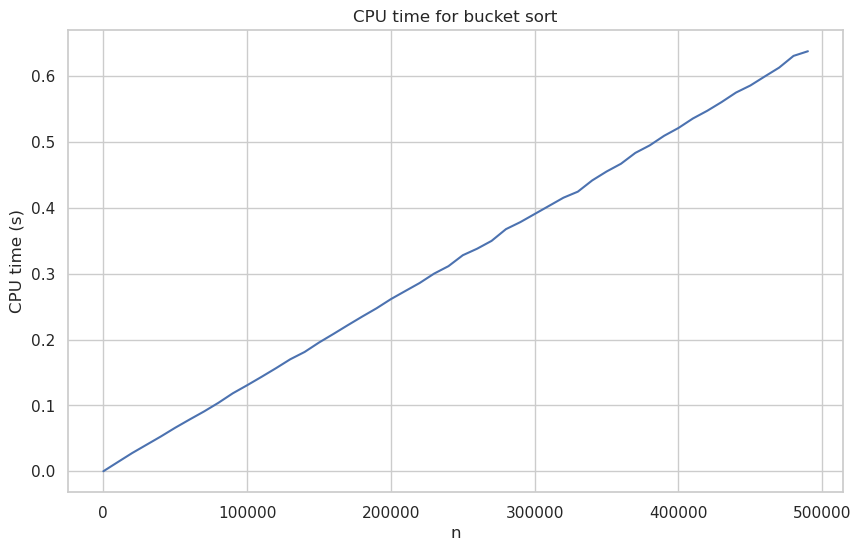

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bucket_sort_time = pd.read_csv('bucket_sort_time.csv', names=['n', 'cpu_time', 'cpu_ticks'])
# plot cpu time
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.title('CPU time for bucket sort')
sns.lineplot(x='n', y='cpu_time', data=bucket_sort_time)
plt.xlabel('n')
plt.ylabel('CPU time (s)')


Ook de meetwaarden laten een prestatie zien van O(n)

# Code

In [ ]:
vector<int> distribution_pass(const vector<int>& data, int j) {

    map<int, vector<int>> buckets;
    for (int i = 0; i < 10; ++i) buckets[i] = vector<int>();
    for (int x : data) {
        int index_b = (x / j) % 10;
        buckets[index_b].push_back(x);
    }

    vector<int> result_data;
    for (auto& bucket : buckets) {
        result_data.insert(result_data.end(), bucket.second.begin(), bucket.second.end());
    }

    return result_data;
}

vector<int> bucket_sort_func(vector<int> data) {
    int max_length = to_string(*max_element(data.begin(), data.end())).length();
    vector<int> pos_array, neg_array;

    if (data.empty()) return {};
    
    // Splits the array into positive and negative arrays so that the arrays can be sorted seperatly. 
    // Negative values are treated as positive and afther sorting put infront of the positive array in reverse order. 
    for (int x : data) {
        if (x >= 0) pos_array.push_back(x); 
        else neg_array.push_back(abs(x));
    }

    // Determins the number of passes needed to sort the array based on the maximum length of the numbers in the array
    for (int x = 0; x < max_length; ++x) {
        int j = pow(10, x);
        pos_array = distribution_pass(pos_array, j);
        neg_array = distribution_pass(neg_array, j);
    }

    for (int& x : neg_array) x *= -1;
    reverse(neg_array.begin(), neg_array.end());

    neg_array.insert(neg_array.end(), pos_array.begin(), pos_array.end());
    return neg_array;
}